## California Housing - regresja liniowa

In [5]:
# california housing dataset linear regression model
# immports and data loading

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import seaborn as sns

# load the dataset
california = fetch_california_housing()
# print(california.DESCR)
# create a dataframe
df = pd.DataFrame(california.data, columns=california.feature_names)
print(df.head())
# add the target
df['Price'] = california.target
# split the data
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


### Model testing without outlier filtering

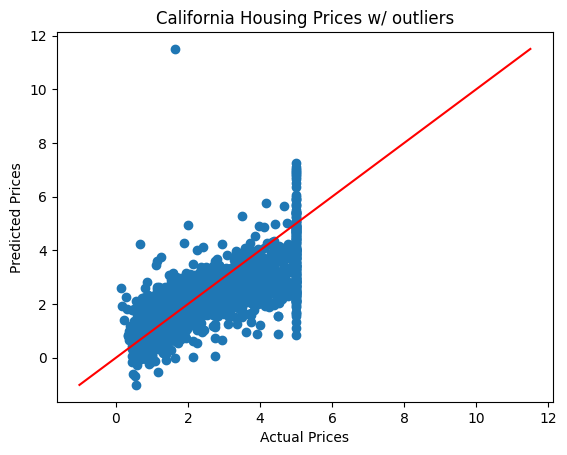

In [6]:
# create the model
model = LinearRegression()
# train the model
model.fit(X_train, y_train)
# make predictions
y_pred = model.predict(X_test)
# plot the results
plt.scatter(y_test, y_pred)
minval = min(y_test.min(), y_pred.min())
maxval = max(y_test.max(), y_pred.max())
plt.plot([minval, maxval], [minval, maxval], 'r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('California Housing Prices w/ outliers')
plt.show()

### Model metrics - score, MAE, MSE, MAPE, price boxplot

Score:  0.5757877060324508
Mean Absolute Error:  0.5332001304956553
Mean Squared Error:  0.5558915986952444
Mean Absolute Percentage Error:  31.95 %


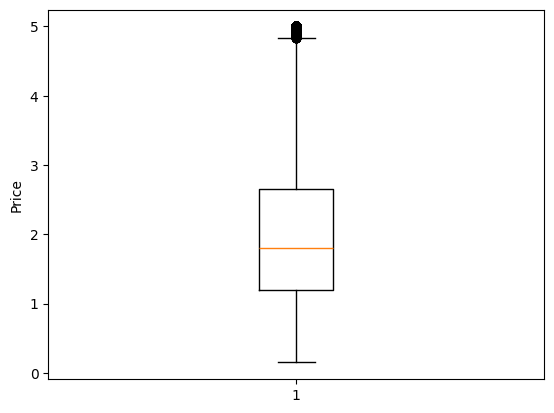

In [7]:
# print the score
print("Score: ", model.score(X_test, y_test))
# print the error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Mean Absolute Percentage Error: ", round(mape*100, 2), "%")

plt.boxplot(y_train)
plt.ylabel('Price')
plt.plot()
plt.show()

### Model without outliers

In [8]:
# delete outliers
df = df[df['Price'] < 5]
# split the data
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# create the model
model = LinearRegression()
# train the model
model.fit(X_train, y_train)
# make predictions
y_pred = model.predict(X_test)

### Results - LR plot shows an improvement

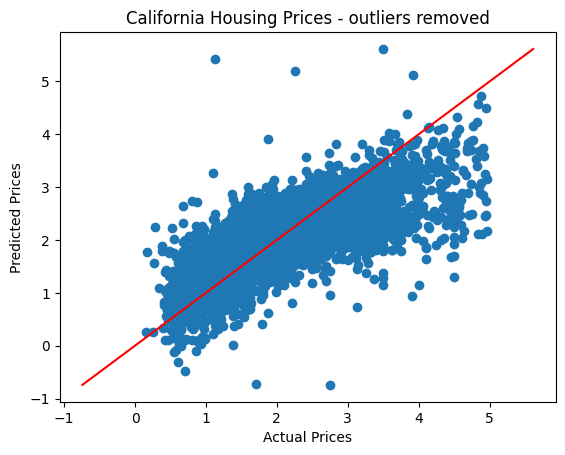

Score:  0.5689352217433337
Mean Absolute Error:  0.4827523169391336
Mean Squared Error:  0.4132737244622422
Mean Absolute Percentage Error:  30.84 %


[]

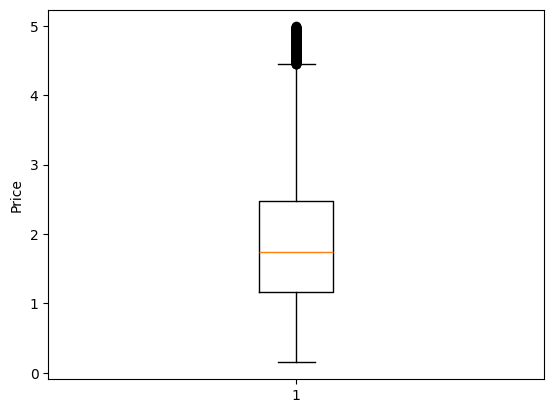

In [9]:
# plot the results
plt.scatter(y_test, y_pred)
minval = min(y_test.min(), y_pred.min())
maxval = max(y_test.max(), y_pred.max())
plt.plot([minval, maxval], [minval, maxval], 'r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('California Housing Prices - outliers removed')
plt.show()
# print the accuracy, sensitivity, and specificity
# print the score
print("Score: ", model.score(X_test, y_test))
# print the error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
#print as percentage, so *100 and round to 2 decimal places
mape = round(mape*100, 2)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("Mean Absolute Percentage Error: ", mape, "%")

plt.boxplot(y_train)
plt.ylabel('Price')
plt.plot()

### Correlation matrix from sns, and coefficients of independent features

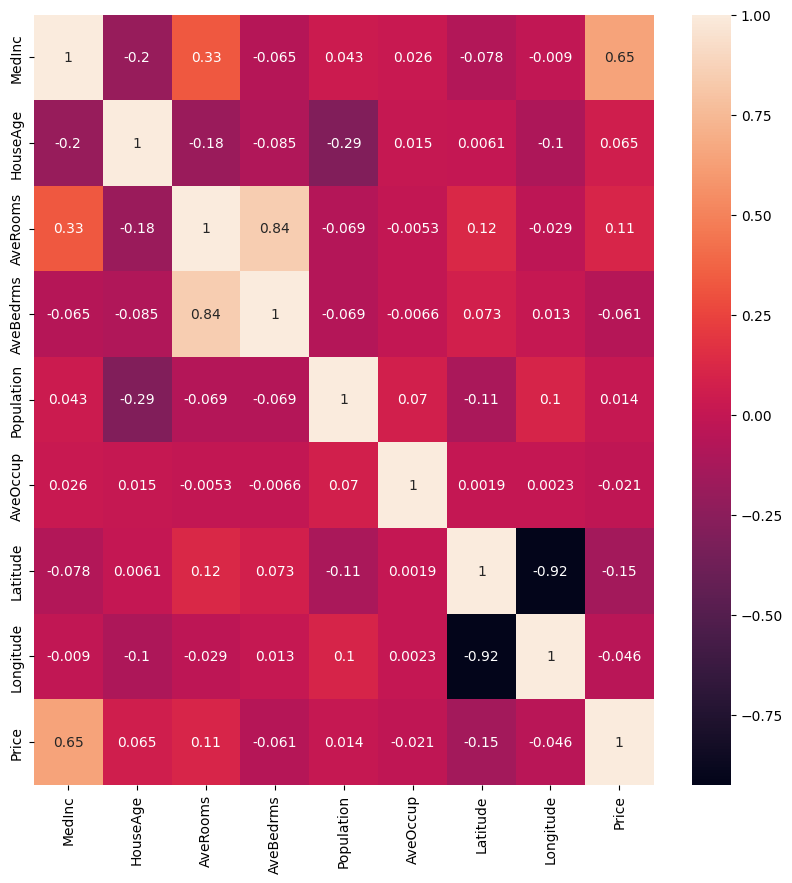

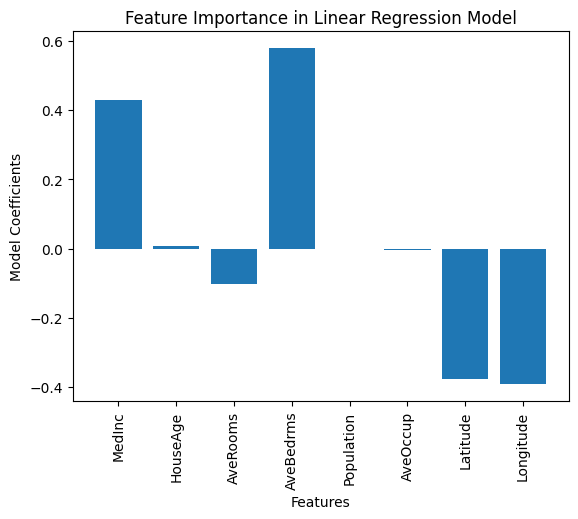

In [10]:
# plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

plt.show()

# Extract feature names (independent variables only)
features = X.columns.to_list()  # Only independent features
fig, ax = plt.subplots(1, 1)  # create the figure and axis

x = np.arange(len(features))   # indices for the features
wagi = model.coef_             # model coefficients (weights)

# Create the bar plot
ax.bar(x, wagi)
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=90)  # set feature names as labels

plt.xlabel('Features')
plt.ylabel('Model Coefficients')
plt.title('Feature Importance in Linear Regression Model')
plt.show()
